In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from statsmodels.tsa.stattools import adfuller

<AxesSubplot:xlabel='Date'>

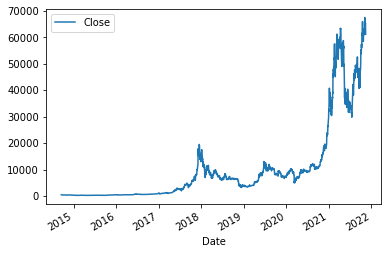

In [2]:
df = yf.Ticker('BTC-USD').history("Max")
df = pd.DataFrame(df['Close'])
df.plot()

In [3]:
df['LogClose'] = np.log(df['Close'])

<AxesSubplot:xlabel='Date'>

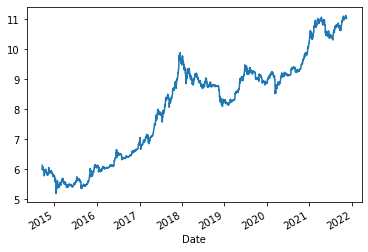

In [4]:
df['LogClose'].plot()

In [5]:
adfuller(df['Close'])

(0.34001300896035214,
 0.9791075964352869,
 28,
 2585,
 {'1%': -3.4328822265006687,
  '5%': -2.862658740388024,
  '10%': -2.5673655460943023},
 41326.22067036474)

In [6]:
# first 2 return values are test-statistic and p-value
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [7]:
def adf(x):
    res = adfuller(x)
    print("Test-Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [8]:
adf(df['Close'])

Test-Statistic: 0.34001300896035214
P-Value: 0.9791075964352869
Non-Stationary


In [9]:
adf(np.random.randn(100))

Test-Statistic: -10.781912010039887
P-Value: 2.2439581008747447e-19
Stationary


In [10]:
adf(np.random.gamma(1,1,100))

Test-Statistic: -8.85439546889126
P-Value: 1.541901164331376e-14
Stationary


In [11]:
adf(df['LogClose'])

Test-Statistic: -0.04678393498017617
P-Value: 0.9544877965201443
Non-Stationary


<AxesSubplot:xlabel='Date'>

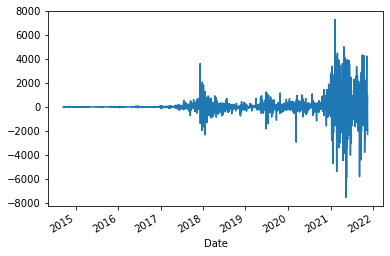

In [12]:
# calculate the return of the stock price
df['Diff'] = df['Close'].diff()
df['Diff'].plot()

In [13]:
adf(df['Diff'].dropna())

Test-Statistic: -8.562305871897447
P-Value: 8.62942191182135e-14
Stationary


In [14]:
# calculate the log return of the stock price
df['DiffLog'] = df['LogClose'].diff()

<AxesSubplot:xlabel='Date'>

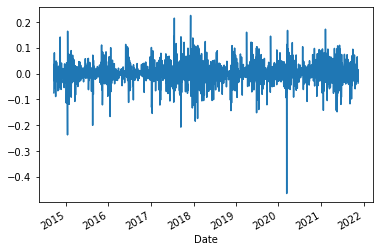

In [15]:
df['DiffLog'].plot()

In [16]:
adf(df['DiffLog'].dropna())

Test-Statistic: -15.3482275365784
P-Value: 3.7507130955857534e-28
Stationary


In [17]:
df.head()

,Close,LogClose,Diff,DiffLog
Date,,,,
2014-09-17,457.334015,6.125414,NaN,NaN
2014-09-18,424.440002,6.050771,-32.894012,-0.074643
2014-09-19,394.795990,5.978369,-29.644012,-0.072402
2014-09-20,408.903992,6.013480,14.108002,0.035111
2014-09-21,398.821014,5.988513,-10.082977,-0.024968


<AxesSubplot:xlabel='Date'>

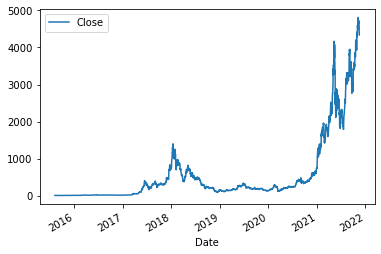

In [18]:
eth = yf.Ticker('ETH-USD').history("Max")
eth = pd.DataFrame(eth['Close'])
eth.plot()

In [19]:
adf(eth['Close'].dropna())

Test-Statistic: 1.91993423453967
P-Value: 0.9985594242045922
Non-Stationary


<AxesSubplot:xlabel='Date'>

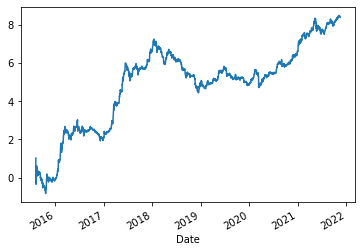

In [20]:
eth['LogClose'] = np.log(eth['Close'])
eth['LogClose'].plot()

In [21]:
adf(eth['LogClose'].dropna())

Test-Statistic: -1.5908940183125941
P-Value: 0.4881661335293021
Non-Stationary


<AxesSubplot:xlabel='Date'>

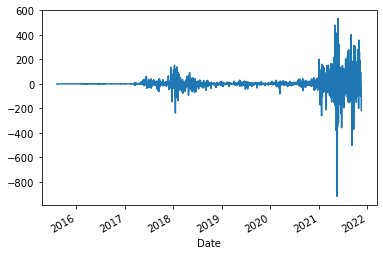

In [22]:
eth['ret'] = eth['Close'].diff()
eth['ret'].plot()

In [23]:
adf(eth['ret'].dropna())

Test-Statistic: -12.540437313681316
P-Value: 2.3209792127978232e-23
Stationary


<AxesSubplot:xlabel='Date'>

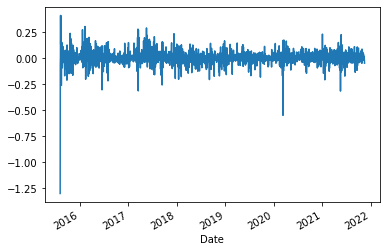

In [28]:
eth['logret'] = eth['LogClose'].diff()
eth['logret'].plot()

In [29]:
adf(eth['logret'].dropna())

Test-Statistic: -8.833081306814405
P-Value: 1.7483745318296426e-14
Stationary


In [27]:
eth.head()

,Close,LogClose,ret,logret
Date,,,,
2015-08-07,2.772120,1.019612,NaN,NaN
2015-08-08,0.753325,-0.283259,-2.018795,NaN
2015-08-09,0.701897,-0.353969,-0.051428,NaN
2015-08-10,0.708448,-0.344679,0.006551,-5.028143
2015-08-11,1.067860,0.065657,0.359412,-1.023286
